# Imports

In [1]:
import pandas as pd 
import numpy as np

### Base com atributos numéricos

In [2]:
# Base tirada de https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame

# Vitória para quando X for o primeiro

jogo_da_velha = pd.read_csv('databases/tic-tac-toe.csv',
                      header=None, 
                      names=[
                          "top-left",
                          "top-middle",
                          "top-right",
                          "middle-left",
                          "middle-middle",
                          "middle-right",
                          "bottom-left",
                          "bottom-middle", 
                          "bottom-right",
                          "Class"
                      ])

jogo_da_velha

,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [3]:
jogo_da_velha.describe()

,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,Class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [4]:
jogo_da_velha.dtypes

top-left         object
top-middle       object
top-right        object
middle-left      object
middle-middle    object
middle-right     object
bottom-left      object
bottom-middle    object
bottom-right     object
Class            object
dtype: object

In [5]:
# jogo_da_velha = pd.get_dummies(jogo_da_velha, 
#                          columns=[], 
#                          prefix=[])
# jogo_da_velha

In [6]:
from sklearn.preprocessing import OrdinalEncoder
atributos = [
                          "top-left",
                          "top-middle",
                          "top-right",
                          "middle-left",
                          "middle-middle",
                          "middle-right",
                          "bottom-left",
                          "bottom-middle", 
                          "bottom-right"
                      ]
enc = OrdinalEncoder()
enc.fit(jogo_da_velha[atributos])
jogo_da_velha[atributos] = enc.transform(jogo_da_velha[atributos])
jogo_da_velha = jogo_da_velha.replace({"positive": "V", "negative": "F"})
jogo_da_velha

,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,Class
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,V
1,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,V
2,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,V
3,2.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,V
4,2.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,V
...,...,...,...,...,...,...,...,...,...,...
953,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,F
954,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,F
955,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,F
956,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,F


In [7]:
from sklearn.preprocessing import StandardScaler

jogo_da_velha[atributos] = StandardScaler().fit_transform(jogo_da_velha[atributos])
#jogo_da_velha = pd.DataFrame(jogo_da_velha)

jogo_da_velha


,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,Class
0,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,1.003223,-0.167318,-0.286827,V
1,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,1.084953,-0.286827,V
2,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,-0.167318,1.003223,V
3,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,-1.419590,-1.576877,V
4,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-1.576877,-0.167318,-1.576877,V
...,...,...,...,...,...,...,...,...,...,...
953,-0.286827,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,1.084953,1.003223,F
954,-0.286827,1.084953,-0.286827,1.084953,0.930371,-0.167318,1.003223,-0.167318,1.003223,F
955,-0.286827,1.084953,-0.286827,1.084953,-0.420077,1.084953,1.003223,-0.167318,1.003223,F
956,-0.286827,1.084953,-0.286827,-0.167318,0.930371,1.084953,1.003223,-0.167318,1.003223,F


## Clusterizando Jogo da Velha
##### Selecionando o X e y

In [8]:
# Selecionando o X e o y


# X = jogo_da_velha[atributos]
X = jogo_da_velha.iloc[:, :9].values # Atributos do Data Frame do Pandas
y = jogo_da_velha.iloc[:, 9:].values # Classes do Data Frame do Pandas

y = np.squeeze(y) # Converter em um unico Array quando usar o dataFrame do Pandas

y_unique = np.unique(y)

# Atualizando o eixo Y
for i in range(len(y_unique)):
    y = [i if y_unique[i] == e else e for e in y]
y = np.array(y)

y_unique # Valores unicos de classes

array(['F', 'V'], dtype=object)

##### Exemplos de Algoritmos para cálculos de distâncias

In [9]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity


eucl = pairwise_distances(X[0].reshape(1, -1), X[1].reshape(1, -1), 'euclidean')

manh = pairwise_distances(X[0].reshape(1, -1), X[1].reshape(1, -1), 'manhattan')

ass_cos = cosine_similarity(X[0].reshape(1, -1), X[1].reshape(1, -1))

print("Euclidiano: ", eucl)
print("Manhattan: ", manh)
print("Assimilaridade do Cosseno: ", ass_cos)

Euclidiano:  [[1.79789124]]
Manhattan:  [[2.5423215]]
Assimilaridade do Cosseno:  [[0.72151831]]


In [10]:
#pd.DataFrame(pairwise_distances(X, metric='euclidean'))


##### PCA

Projecting 9-dimensional data to 2D


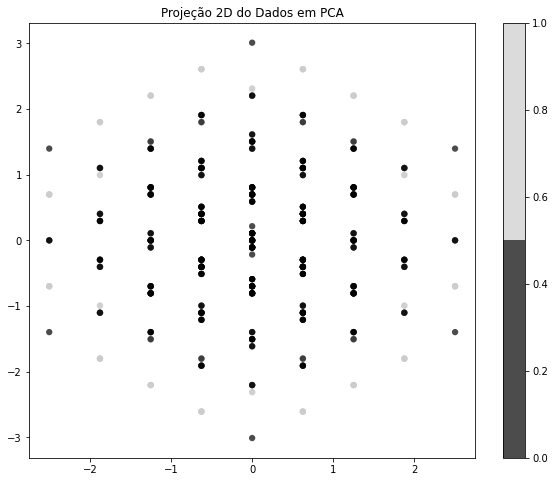

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

def plot_g(pyplot, title, colors, n_classes):
    pyplot.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, 
             edgecolor='none', alpha=0.7, s=40,
             cmap=plt.cm.get_cmap('nipy_spectral', n_classes)
           )
    pyplot.colorbar()
    pyplot.title(title)

plt.figure(figsize=(10, 8)) # Tamanho da Figura
plot_g(plt, 'Projeção 2D do Dados em PCA', y, len(y_unique))
plt.show()


##### KMeans com a base original e com o PCA

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(y_unique)).fit(X)
labels = kmeans.labels_

kmeans_PCA = KMeans(n_clusters=len(y_unique)).fit(X_reduced)
labels_PCA = kmeans_PCA.labels_


##### Plotando os Gráficos 

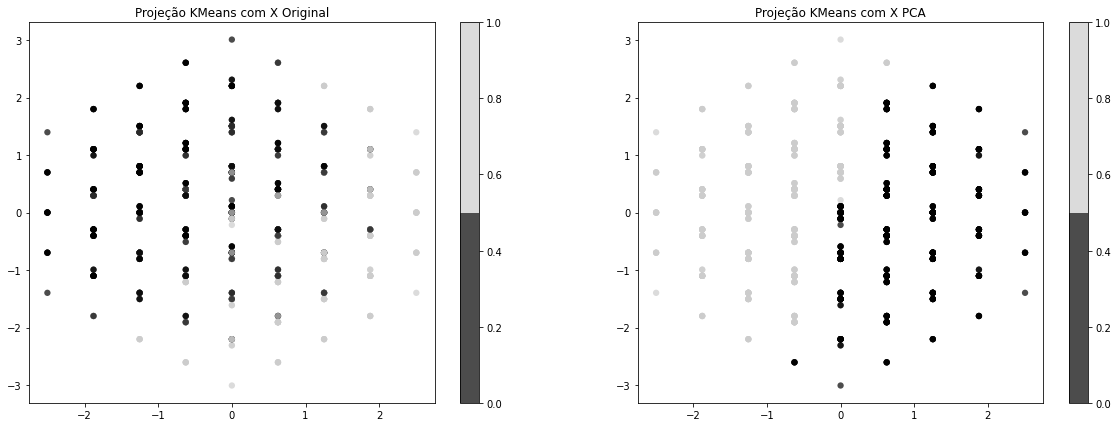

In [13]:

plt.figure(figsize=(10*2, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
plt.colorbar()
plt.title('Projeção KMeans com X Original')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_PCA, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
plt.colorbar()
plt.title('Projeção KMeans com X PCA')

plt.show()

##### Comparando o KMeans, KMeans PCA e o y Original

In [14]:
print("Comparação: ")

unique, counts = np.unique(labels, return_counts=True) # KMeans
print("KMeans X: " , dict(zip(unique, counts)))

unique, counts = np.unique(labels_PCA, return_counts=True) # KMeans PCA
print("KM.. PCA: ", dict(zip(unique, counts)))

unique, counts = np.unique(y, return_counts=True) # Original
print("Original: ", dict(zip(unique, counts)))


Comparação: 
KMeans X:  {0: 454, 1: 504}
KM.. PCA:  {0: 504, 1: 454}
Original:  {0: 332, 1: 626}
